In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
%run params.py
import os
PREFIX = "eSTR-enrich"
RESULTSDIR = os.path.join(BASERESULTSDIR, PREFIX)
motif = pd.read_csv(os.path.join(RESULTSDIR, "SuppTable_MotifEnrich.csv"))

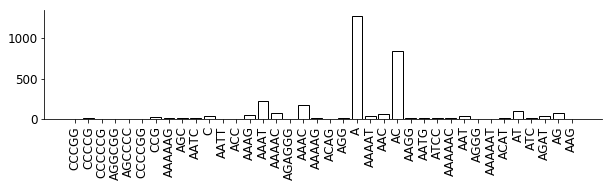

In [22]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', rotation=45)
        
fig = plt.figure()
fig.set_size_inches((10, 2))
ax = fig.add_subplot(111)
bars = ax.bar(range(motif.shape[0]), motif["num.causal"], color="white", edgecolor="black")
#autolabel(bars)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(range(motif.shape[0]))
ax.set_xticklabels([item.replace("_", " ") for item in motif["annot"]], size=12, rotation=90)

ax.set_yticklabels([int(item) for item in ax.get_yticks()], size=12)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom');

In [ ]:
for period in range(1, 7):
    all_mono_outfile = "/storage/mgymrek/gtex/homer-plots/annfiles/all_strs_%s.bed"%period
    all_strs[(all_strs["motif"].apply(len)==period)][["chrom","str.start","str.end","id","x","gene.strand"]].to_csv(all_mono_outfile, sep="\t", index=False, header=False)
    causal_mono_outfile = "/storage/mgymrek/gtex/homer-plots/annfiles/all_causal_%s.bed"%period
    causal[(causal["motif"].apply(len)==period)][["chrom","str.start","str.end","id","x","gene.strand"]].to_csv(causal_mono_outfile, sep="\t", index=False, header=False)
    estr_mono_outfile = "/storage/mgymrek/gtex/homer-plots/annfiles/all_estr_%s.bed"%period
    estrs[(estrs["motif"].apply(len)==period)][["chrom","str.start","str.end","id","x","gene.strand"]].to_csv(estr_mono_outfile, sep="\t", index=False, header=False)

all_outfile = "/storage/mgymrek/gtex/homer-plots/annfiles/all_strs.bed"
all_strs[["chrom","str.start","str.end","id","x","gene.strand"]].to_csv(all_outfile, sep="\t", index=False, header=False)
estr_outfile = "/storage/mgymrek/gtex/homer-plots/annfiles/all_estrs.bed"
estrs[["chrom","str.start","str.end","id","x","gene.strand"]].to_csv(estr_outfile, sep="\t", index=False, header=False)
causal_outfile = "/storage/mgymrek/gtex/homer-plots/annfiles/all_causal_estrs.bed"
causal[["chrom","str.start","str.end","id","x","gene.strand"]].to_csv(causal_outfile, sep="\t", index=False, header=False)

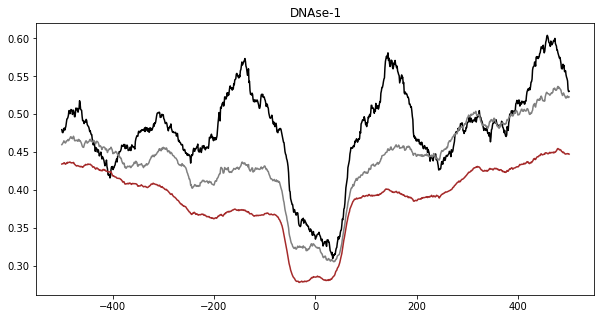

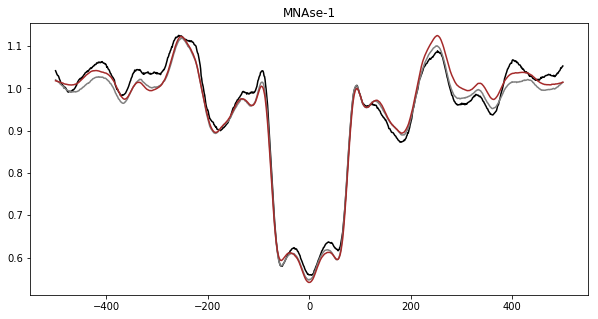

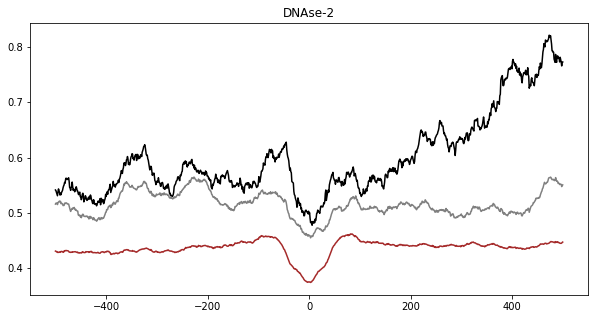

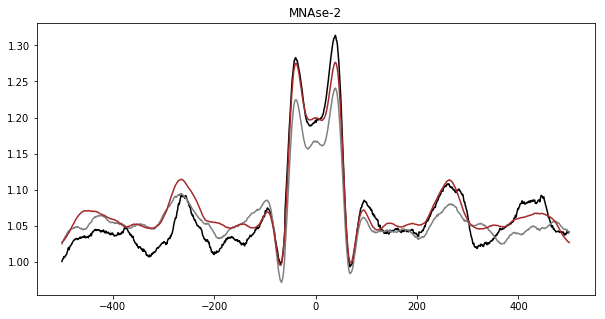

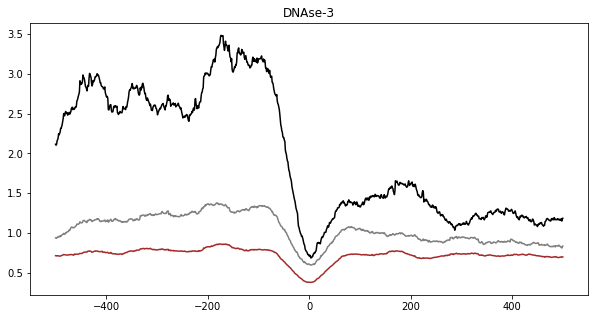

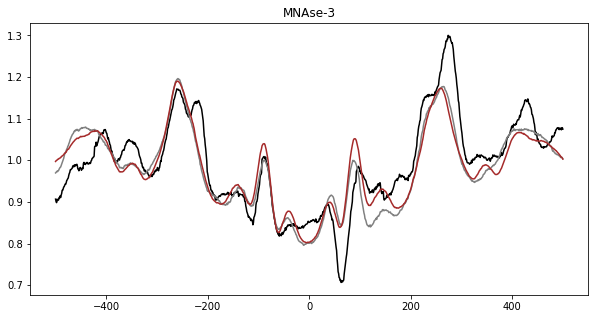

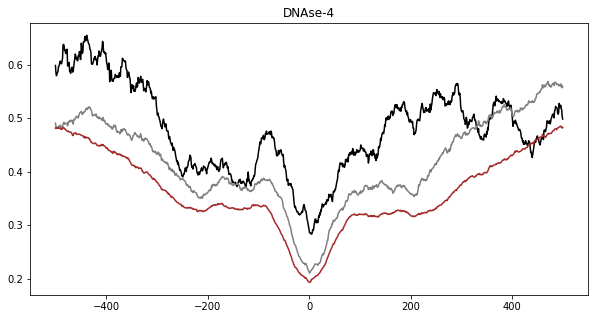

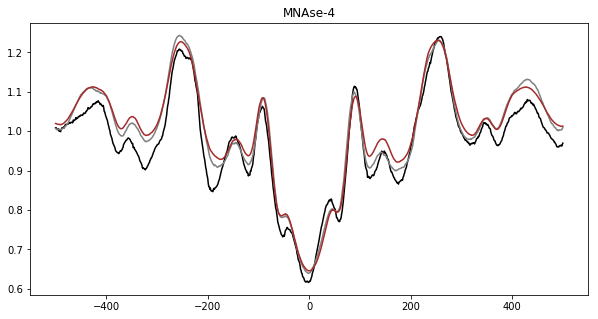

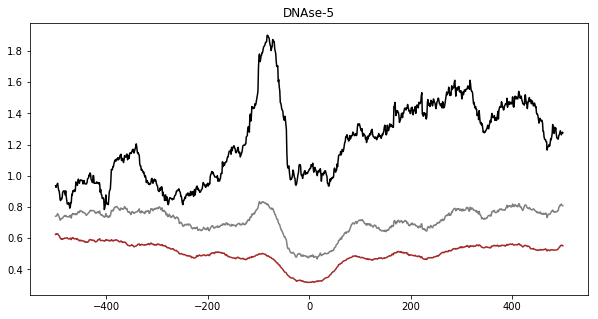

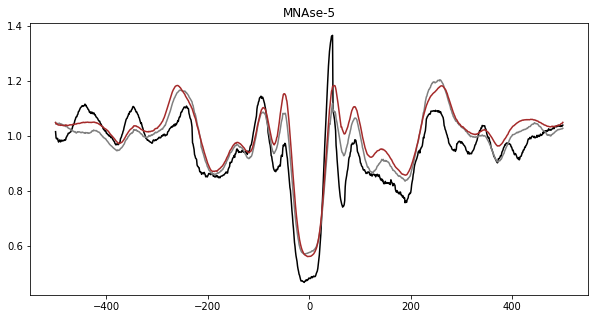

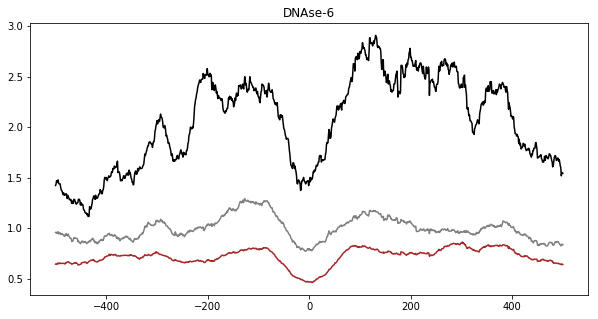

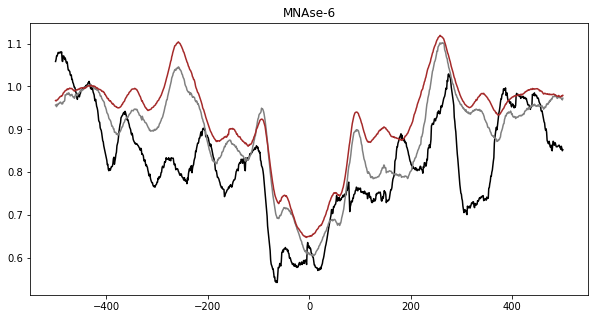

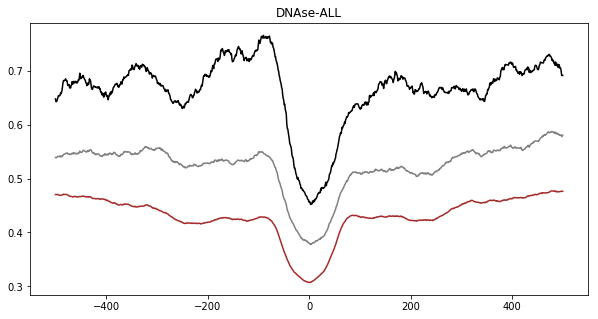

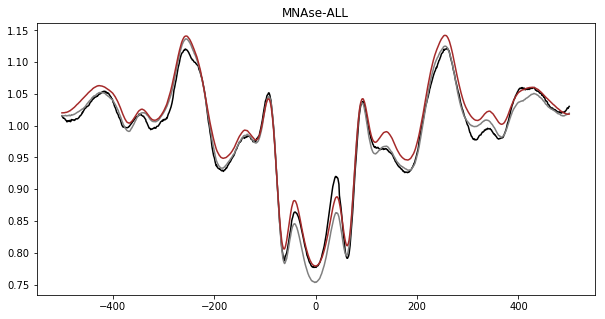

In [3]:
dcols = ["dist","count-dnase-GM12878","5p1","3p1",
          "count-mnase-GM12878", "5p1","3p2"]
cols = ["dist","count-mnase-GM12878","5p1","3p1"]


for period in list(range(1, 7))+["ALL"]:
    if period != "ALL":
        mn_all = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_strs_%s-wig.txt"%period, sep="\t")
        mn_causal = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_causal_%s-wig.txt"%period, sep="\t")
        mn_estr = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_estr_%s-wig.txt"%period, sep="\t")
    else:
        mn_all = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_strs-wig.txt", sep="\t")
        mn_causal = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_causal_estrs-wig.txt", sep="\t")
        mn_estr = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_estrs-wig.txt", sep="\t")
    if period != "ALL":
        dn_all = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_strs_%s.txt"%period, sep="\t")
        dn_causal = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_causal_%s.txt"%period, sep="\t")
        dn_estr = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_estr_%s.txt"%period, sep="\t")
    else:
        dn_all = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_strs.txt", sep="\t")
        dn_causal = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_causal_estrs.txt", sep="\t")
        dn_estr = pd.read_csv("/storage/mgymrek/gtex/homer-plots/taghist-dnase-all_estrs.txt", sep="\t")

    mn_all.columns = cols
    mn_causal.columns = cols
    mn_estr.columns = cols
    dn_all.columns = dcols
    dn_causal.columns = dcols
    dn_estr.columns = dcols
    for usecol in ["count-dnase-GM12878"]:
        fig = plt.figure()
        fig.set_size_inches((10, 5))
        ax = fig.add_subplot(111)
        ax.plot(dn_causal["dist"], dn_causal[usecol], color="black")
        ax.plot(dn_estr["dist"], dn_estr[usecol], color="gray")
        ax.plot(dn_all["dist"], dn_all[usecol], color="brown")
        ax.set_title("DNAse-%s"%period)
    for usecol in ["count-mnase-GM12878"]:
        fig = plt.figure()
        fig.set_size_inches((10, 5))
        ax = fig.add_subplot(111)
        ax.plot(mn_causal["dist"], mn_causal[usecol], color="black")
        ax.plot(mn_estr["dist"], mn_estr[usecol], color="gray")
        ax.plot(mn_all["dist"], mn_all[usecol], color="brown")
        ax.set_title("MNAse-%s"%period)